<a href="https://colab.research.google.com/github/sanjaybhat2004/HCR/blob/main/HCR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing the Kaggle API 
! pip install -q kaggle 


In [ ]:
# enable file uploading functionality and upload the kaggle api token
from google.colab import files

files.upload()  

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"monopoly21","key":"99a481595954d90ce3d63c7b5a6eef6c"}'}

In [ ]:
! mkdir ~/.kaggle #creates a new directory named .kaggle in the user's home directory
!cp kaggle.json ~/.kaggle/ #copies  kaggle.json to the newly created .kaggle directory

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json #sets the file permissions for the kaggle.json file to read and write only for the owner of the file

In [ ]:
# downloading the dataset
! kaggle datasets download -d sankalpsrivastava26/capital-alphabets-28x28

 90% 2.87G/3.17G [02:32<00:13, 25.0MB/s]

In [ ]:
#sets up the necessary frameworks and libraries for building a CNN for image classification
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K

import numpy as np


In [ ]:
! mkdir train

In [ ]:
! unzip capital-alphabets-28x28.zip -d train

In [ ]:
def dict(number):
  if number >= 0 and number  <= 25:
    return chr(number+65)
  return chr(number+71)


In [ ]:
word_dict = {}

In [ ]:
#Initialising dictionary to store uppercase and lowercase letters and make a dictionary with each letter mapped to a number
for i in range(0, 52):
  word_dict[i] = dict(i)



In [ ]:

word_dict

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z',
 26: 'a',
 27: 'b',
 28: 'c',
 29: 'd',
 30: 'e',
 31: 'f',
 32: 'g',
 33: 'h',
 34: 'i',
 35: 'j',
 36: 'k',
 37: 'l',
 38: 'm',
 39: 'n',
 40: 'o',
 41: 'p',
 42: 'q',
 43: 'r',
 44: 's',
 45: 't',
 46: 'u',
 47: 'v',
 48: 'w',
 49: 'x',
 50: 'y',
 51: 'z'}

In [ ]:
dict(0)

'A'

In [ ]:
model = tf.keras.models.Sequential([
    #input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 52 output neuron.
    tf.keras.layers.Dense(52, activation='softmax')
])

In [ ]:
%cd train

/content/train


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(
    directory = "./datasetSmall/train",
    target_size=(300, 300))

Found 111713 images belonging to 26 classes.


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 35, 35, 64)      

In [ ]:
val = train_datagen.flow_from_directory(
    directory = "./datasetSmall/validation",
    target_size=(300, 300))

Found 37374 images belonging to 26 classes.


In [ ]:
from tqdm import tqdm
# extracting values from val test generator
val.reset()
X_val,y_val = next(val)
for i in tqdm(range(int(len(val)/32)-1)): #1st batch is already fetched before the for loop.
    img, label = next(val)
    X_val = np.append(X_val, img, axis=0 )
    y_val = np.append(y_val, label, axis=0)
print(X_val.shape, y_val.shape)

100%|██████████| 35/35 [00:17<00:00,  2.04it/s]

(1152, 300, 300, 3) (1152, 26)


In [ ]:
checkpointer = EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 15)

In [ ]:
history = model.fit(
            train ,
            steps_per_epoch =len(train)//32, #batch size is 32
            epochs=30,
            verbose=1,
            validation_data=(X_val,y_val),
            callbacks = [checkpointer])

Epoch 1/30
109/109 [==============================] - 21s 156ms/step - loss: 1.2316 - accuracy: 0.6660 - val_loss: 0.7102 - val_accuracy: 0.7899
Epoch 2/30
109/109 [==============================] - 15s 138ms/step - loss: 0.6445 - accuracy: 0.8157 - val_loss: 0.5172 - val_accuracy: 0.8516
Epoch 3/30
109/109 [==============================] - 14s 132ms/step - loss: 0.5322 - accuracy: 0.8432 - val_loss: 0.5149 - val_accuracy: 0.8498
Epoch 4/30
109/109 [==============================] - 16s 149ms/step - loss: 0.4643 - accuracy: 0.8615 - val_loss: 0.4897 - val_accuracy: 0.8550
Epoch 5/30
109/109 [==============================] - 15s 137ms/step - loss: 0.4196 - accuracy: 0.8790 - val_loss: 0.4385 - val_accuracy: 0.8707
Epoch 6/30
109/109 [==============================] - 15s 140ms/step - loss: 0.4154 - accuracy: 0.8782 - val_loss: 0.3973 - val_accuracy: 0.8845
Epoch 7/30
109/109 [==============================] - 14s 132ms/step - loss: 0.4436 - accuracy: 0.8730 - val_loss: 0.3766 - val_ac

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use(['default'])
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

NameError: ignored

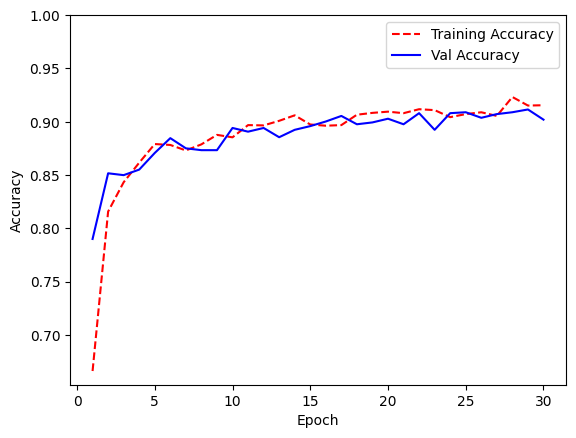

In [ ]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(top = 1)
plt.show()

1/1 [==============================] - 0s 54ms/step
E


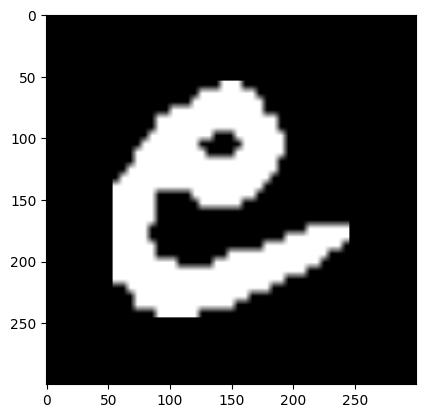

In [ ]:

# predict = model.predict(x_test)
# print(word_dict[np.argmax(predict[4])])
# plt.figure()
# plt.imshow(x_test[4])
# plt.grid(False)
# plt.show()


In [ ]:
test = train_datagen.flow_from_directory(
    directory = "./datasetSmall/test",
    target_size=(300, 300))

Found 37358 images belonging to 26 classes.


In [ ]:
print(f"Test accuracy = {model.evaluate(test ,batch_size=32,steps=len(test)//32)[1]*100}%")

36/36 [==============================] - 4s 119ms/step - loss: 0.2847 - accuracy: 0.9167
Test accuracy = 91.66666865348816%


In [ ]:
model.save('hcr_model.h5')